In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
n_data_per_class = 50
num_class = 4
dim_data = 2
n_data = n_data_per_class * num_class

data1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data_per_class).astype(np.float32)
data2 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data_per_class).astype(np.float32)
data3 = np.random.multivariate_normal([12,0], [[1,0],[0,1]], n_data_per_class).astype(np.float32)
data4 = np.random.multivariate_normal([8,4], [[1,0],[0,1]], n_data_per_class).astype(np.float32)
data_x = np.vstack([data1,data2,data3,data4])


data_y = np.zeros([n_data, num_class])
for i in range(num_class):
    s_idx = i*n_data_per_class
    e_idx = s_idx + n_data_per_class
    data_y[s_idx:e_idx,i] = 1


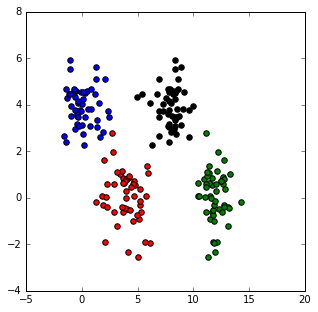

In [3]:
def draw_state():
    plt.rcParams['figure.figsize']=(5,5)
    plt.scatter(data1[:,0],data1[:,1],30,'r')
    plt.scatter(data2[:,0],data2[:,1],30,'b')
    plt.scatter(data3[:,0],data1[:,1],30,'g')
    plt.scatter(data4[:,0],data2[:,1],30,'k')

    [x1min,x1max,x2min,x2max] = plt.axis()
    x1val = np.arange(x1min,x1max,0.1)
    #wval = w.get_value(borrow=True)
    #bval = b.get_value(borrow=True)
    #plt.plot(x1val, -(wval[0]*x1val+bval)/wval[1], 'k')
    plt.axis([x1min,x1max,x2min,x2max])
    plt.show()
    
draw_state()

In [6]:
# Create the model

x = tf.placeholder(tf.float32, [None, dim_data])
W = tf.Variable(tf.zeros([dim_data, num_class]))
b = tf.Variable(tf.zeros([num_class]))
y = tf.matmul(x, W) + b

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, num_class])

In [7]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [8]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
sess.run(tf.initialize_all_variables())


In [9]:
batch_size_per_class = 40

In [10]:
# Train
for i in range(1000):
    idx = [i * 4 for i in range(batch_size_per_class)]
    batch_xs = data_x[idx, :]
    batch_ys = data_y[idx, :]
    result = sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})



In [11]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: data_x,
                                      y_: data_y}))

0.99
